## Importation du jeu de données

In [85]:
import pandas as pd
import pickle

df = pd.read_csv('./donnees/valeursfoncieres-2021.txt', sep="|", decimal=",")
df.head()

C:\Users\Maurin\AppData\Local\Temp\ipykernel_20988\562635679.py:4: DtypeWarning:

Columns (18,23,24,26,28,30,41) have mixed types. Specify dtype option on import or set low_memory=False.



,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,97.0,5.0,S,NaN,2410.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,2410.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,530.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,88.0,4.0,S,NaN,866.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,168.0,5.0,S,NaN,1426.0


### Suppression des colonnes / lignes inutiles du fichier

In [86]:
print("Taille de notre dataframe sans les colonnes contenant que des NaN :", df.shape)

Taille de notre dataframe sans les colonnes contenant que des NaN : (4649209, 43)


In [87]:
### Suppression de colonnes dont on a aucune données
df_wo_NaN = df.dropna(axis=1, how='all') 

In [88]:
# Nouvelle colonne 'col_concat' avec l'adresse et la date de vente jointe
cols_to_join = ['Date mutation', 'Type de voie', 'No voie', 'Code voie', 'Voie', 'Code postal', 'Commune']
df_wo_NaN['col_concat'] = df_wo_NaN[cols_to_join].apply(lambda x: ''.join(map(str,x)), axis=1)
df_wo_NaN.head(5)

C:\Users\Maurin\AppData\Local\Temp\ipykernel_20988\1783435052.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,col_concat
0,1,05/01/2021,Vente,185000.0,5080.0,NaN,CHE,0471,DE VOGELAS,1370.0,...,NaN,0,1.0,Maison,97.0,5.0,S,NaN,2410.0,05/01/2021CHE5080.00471DE VOGELAS1370.0VAL-REV...
1,1,05/01/2021,Vente,185000.0,5080.0,NaN,CHE,0471,DE VOGELAS,1370.0,...,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,2410.0,05/01/2021CHE5080.00471DE VOGELAS1370.0VAL-REV...
2,1,06/01/2021,Vente,10.0,NaN,NaN,NaN,B043,ROUGEMONT,1290.0,...,NaN,0,NaN,NaN,NaN,NaN,BT,NaN,530.0,06/01/2021nannanB043ROUGEMONT1290.0BEY
3,1,04/01/2021,Vente,204332.0,7.0,NaN,ALL,0276,DES ECUREUILS,1310.0,...,NaN,0,1.0,Maison,88.0,4.0,S,NaN,866.0,04/01/2021ALL7.00276DES ECUREUILS1310.0BUELLAS
4,1,06/01/2021,Vente,320000.0,87.0,NaN,RTE,0140,DE CERTINES,1250.0,...,NaN,0,1.0,Maison,168.0,5.0,S,NaN,1426.0,06/01/2021RTE87.00140DE CERTINES1250.0MONTAGNAT


In [89]:
# On supprime les lignes ayant la même valeur dans col_concat
df_wo_NaN = df_wo_NaN.drop_duplicates(subset='col_concat', keep=False)
df_wo_NaN

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,col_concat
2,1,06/01/2021,Vente,10.0,NaN,NaN,NaN,B043,ROUGEMONT,1290.0,...,NaN,0,NaN,NaN,NaN,NaN,BT,NaN,530.0,06/01/2021nannanB043ROUGEMONT1290.0BEY
3,1,04/01/2021,Vente,204332.0,7.0,NaN,ALL,0276,DES ECUREUILS,1310.0,...,NaN,0,1.0,Maison,88.0,4.0,S,NaN,866.0,04/01/2021ALL7.00276DES ECUREUILS1310.0BUELLAS
6,2,04/01/2021,Vente,36.3,NaN,NaN,NaN,B077,COMBET MAILLET,1250.0,...,NaN,0,NaN,NaN,NaN,NaN,BT,NaN,121.0,04/01/2021nannanB077COMBET MAILLET1250.0CORVEI...
9,2,11/01/2021,Vente,400.0,NaN,NaN,NaN,B085,PRE BROUILLET,1310.0,...,NaN,0,NaN,NaN,NaN,NaN,P,NaN,460.0,11/01/2021nannanB085PRE BROUILLET1310.0MONTCET
12,1,07/01/2021,Vente,4780.0,NaN,NaN,NaN,B013,BERARDAN,1340.0,...,NaN,0,NaN,NaN,NaN,NaN,P,NaN,7105.0,07/01/2021nannanB013BERARDAN1340.0FOISSIAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649204,1,12/03/2021,Vente,383000.0,8.0,NaN,RUE,9382,DES TOURNELLES,75004.0,...,NaN,2,2.0,Appartement,30.0,2.0,NaN,NaN,NaN,12/03/2021RUE8.09382DES TOURNELLES75004.0PARIS 04
4649205,1,17/03/2021,Vente,260000.0,8.0,NaN,RUE,8561,SAINTE FOY,75002.0,...,NaN,2,2.0,Appartement,37.0,2.0,NaN,NaN,NaN,17/03/2021RUE8.08561SAINTE FOY75002.0PARIS 02
4649206,1,19/03/2021,Vente,38000.0,6.0,NaN,RUE,4398,DES GUILLEMITES,75004.0,...,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,19/03/2021RUE6.04398DES GUILLEMITES75004.0PARI...
4649207,1,30/03/2021,Vente,38000.0,30.0,NaN,RUE,7338,DU PETIT MUSC,75004.0,...,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,30/03/2021RUE30.07338DU PETIT MUSC75004.0PARIS 04


In [90]:
# pourcentage des valeurs manquantes dans chaque colonne 
pourcentage_manquant = (df_wo_NaN.isna().sum() / len(df_wo_NaN)) * 100
pourcentage_manquant

No disposition                 0.000000
Date mutation                  0.000000
Nature mutation                0.000000
Valeur fonciere                0.386354
No voie                       35.819898
B/T/Q                         95.538637
Type de voie                  36.938124
Code voie                      0.218035
Voie                           0.222828
Code postal                    0.221497
Commune                        0.000000
Code departement               0.000000
Code commune                   0.000000
Prefixe de section            95.655555
Section                        0.002131
No plan                        0.000000
No Volume                     99.719201
1er lot                       75.331291
Surface Carrez du 1er lot     90.383753
2eme lot                      95.453678
Surface Carrez du 2eme lot    98.658590
3eme lot                      99.017957
Surface Carrez du 3eme lot    99.824489
4eme lot                      99.609118
Surface Carrez du 4eme lot    99.948332


In [91]:
#on classe par ordre decroissant
pourcentage_manquant = pourcentage_manquant.sort_values(ascending=False)
pourcentage_manquant 

Surface Carrez du 5eme lot    99.978250
Surface Carrez du 4eme lot    99.948332
Surface Carrez du 3eme lot    99.824489
5eme lot                      99.802118
No Volume                     99.719201
4eme lot                      99.609118
3eme lot                      99.017957
Surface Carrez du 2eme lot    98.658590
Nature culture speciale       96.878537
Prefixe de section            95.655555
B/T/Q                         95.538637
2eme lot                      95.453678
Surface Carrez du 1er lot     90.383753
1er lot                       75.331291
Nombre pieces principales     41.670521
Surface reelle bati           41.670521
Type local                    41.570559
Code type local               41.570559
Type de voie                  36.938124
No voie                       35.819898
Nature culture                25.175977
Surface terrain               25.175977
Valeur fonciere                0.386354
Voie                           0.222828
Code postal                    0.221497


In [92]:
#les colonnes que nous aloons suprimer
#les colonnes ayant plus de 95 % de données manquantes
pourcentage_manquant.iloc[0:12,]

Surface Carrez du 5eme lot    99.978250
Surface Carrez du 4eme lot    99.948332
Surface Carrez du 3eme lot    99.824489
5eme lot                      99.802118
No Volume                     99.719201
4eme lot                      99.609118
3eme lot                      99.017957
Surface Carrez du 2eme lot    98.658590
Nature culture speciale       96.878537
Prefixe de section            95.655555
B/T/Q                         95.538637
2eme lot                      95.453678
dtype: float64

In [93]:
#On supprime les colonnes
df_wo_NaN  = df_wo_NaN.drop(columns= {'Surface Carrez du 5eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 3eme lot', 'No Volume', '5eme lot', '4eme lot', '3eme lot', 'Surface Carrez du 2eme lot', 'Nature culture speciale', 'B/T/Q',  'Prefixe de section', '2eme lot', 'Code type local', 'No voie', 'Code voie', 'Code departement'})
df_wo_NaN

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Voie,Code postal,Commune,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,col_concat
2,1,06/01/2021,Vente,10.0,NaN,ROUGEMONT,1290.0,BEY,42,A,204,NaN,NaN,0,NaN,NaN,NaN,BT,530.0,06/01/2021nannanB043ROUGEMONT1290.0BEY
3,1,04/01/2021,Vente,204332.0,ALL,DES ECUREUILS,1310.0,BUELLAS,65,B,1325,NaN,NaN,0,Maison,88.0,4.0,S,866.0,04/01/2021ALL7.00276DES ECUREUILS1310.0BUELLAS
6,2,04/01/2021,Vente,36.3,NaN,COMBET MAILLET,1250.0,CORVEISSIAT,125,C,1691,NaN,NaN,0,NaN,NaN,NaN,BT,121.0,04/01/2021nannanB077COMBET MAILLET1250.0CORVEI...
9,2,11/01/2021,Vente,400.0,NaN,PRE BROUILLET,1310.0,MONTCET,259,C,459,NaN,NaN,0,NaN,NaN,NaN,P,460.0,11/01/2021nannanB085PRE BROUILLET1310.0MONTCET
12,1,07/01/2021,Vente,4780.0,NaN,BERARDAN,1340.0,FOISSIAT,163,WA,155,NaN,NaN,0,NaN,NaN,NaN,P,7105.0,07/01/2021nannanB013BERARDAN1340.0FOISSIAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649204,1,12/03/2021,Vente,383000.0,RUE,DES TOURNELLES,75004.0,PARIS 04,104,AO,117,14,28.86,2,Appartement,30.0,2.0,NaN,NaN,12/03/2021RUE8.09382DES TOURNELLES75004.0PARIS 04
4649205,1,17/03/2021,Vente,260000.0,RUE,SAINTE FOY,75002.0,PARIS 02,102,AP,128,304,NaN,2,Appartement,37.0,2.0,NaN,NaN,17/03/2021RUE8.08561SAINTE FOY75002.0PARIS 02
4649206,1,19/03/2021,Vente,38000.0,RUE,DES GUILLEMITES,75004.0,PARIS 04,104,AH,68,121,NaN,1,Dépendance,0.0,0.0,NaN,NaN,19/03/2021RUE6.04398DES GUILLEMITES75004.0PARI...
4649207,1,30/03/2021,Vente,38000.0,RUE,DU PETIT MUSC,75004.0,PARIS 04,104,AP,5,399,NaN,1,Dépendance,0.0,0.0,NaN,NaN,30/03/2021RUE30.07338DU PETIT MUSC75004.0PARIS 04


In [94]:
#on supprime les données avec des valeurs foncières inférieurs à 100
#on enleve les biens qui ont été vendus pour des valeurs symboliques
df_wo_NaN = df_wo_NaN[df_wo_NaN['Valeur fonciere'] >= 100]
##on supprime egalement pour l entrainement les donnees sans leur type local
df_wo_NaN = df_wo_NaN.dropna(subset=['Type local'])
df_wo_NaN

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Voie,Code postal,Commune,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,col_concat
3,1,04/01/2021,Vente,204332.0,ALL,DES ECUREUILS,1310.0,BUELLAS,65,B,1325,NaN,NaN,0,Maison,88.0,4.0,S,866.0,04/01/2021ALL7.00276DES ECUREUILS1310.0BUELLAS
14,2,04/01/2021,Vente,226700.0,CHE,DU MOULIN DE POLAIZE,1310.0,POLLIAT,301,AA,289,NaN,NaN,0,Maison,96.0,3.0,NaN,NaN,04/01/2021CHE173.00164DU MOULIN DE POLAIZE1310...
15,1,08/01/2021,Vente,185000.0,RUE,DES GRANGES BONNET,1960.0,PERONNAS,289,AD,31,NaN,NaN,0,Maison,100.0,4.0,S,703.0,08/01/2021RUE46.00161DES GRANGES BONNET1960.0P...
16,1,07/01/2021,Vente,114500.0,RUE,DE LA MAIRIE,1340.0,FOISSIAT,163,AB,302,NaN,NaN,0,Maison,85.0,2.0,S,87.0,07/01/2021RUE179.00110DE LA MAIRIE1340.0FOISSIAT
19,1,08/01/2021,Vente,145000.0,IMP,DE CHAMANDRE,1340.0,FOISSIAT,163,WC,215,NaN,NaN,0,Maison,92.0,1.0,S,2480.0,08/01/2021IMP8.00255DE CHAMANDRE1340.0FOISSIAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649204,1,12/03/2021,Vente,383000.0,RUE,DES TOURNELLES,75004.0,PARIS 04,104,AO,117,14,28.86,2,Appartement,30.0,2.0,NaN,NaN,12/03/2021RUE8.09382DES TOURNELLES75004.0PARIS 04
4649205,1,17/03/2021,Vente,260000.0,RUE,SAINTE FOY,75002.0,PARIS 02,102,AP,128,304,NaN,2,Appartement,37.0,2.0,NaN,NaN,17/03/2021RUE8.08561SAINTE FOY75002.0PARIS 02
4649206,1,19/03/2021,Vente,38000.0,RUE,DES GUILLEMITES,75004.0,PARIS 04,104,AH,68,121,NaN,1,Dépendance,0.0,0.0,NaN,NaN,19/03/2021RUE6.04398DES GUILLEMITES75004.0PARI...
4649207,1,30/03/2021,Vente,38000.0,RUE,DU PETIT MUSC,75004.0,PARIS 04,104,AP,5,399,NaN,1,Dépendance,0.0,0.0,NaN,NaN,30/03/2021RUE30.07338DU PETIT MUSC75004.0PARIS 04


In [107]:
print("Taille de notre dataframe final:", df_wo_NaN.shape)

Taille de notre dataframe final: (656022, 21)


In [96]:
#Pour recupérer la datframe sur d'autress fichiers
with open('dataframe.pkl', 'wb') as file:
    pickle.dump(df_wo_NaN, file)

On veut retrouver les colonnes qui ont été supprimées

In [97]:
list(df.columns)

colonnes_suppr = [col for col in df if col not in df_wo_NaN.columns]

print("Les colonnes supprimées sont :", colonnes_suppr)

Les colonnes supprimées sont : ['Identifiant de document', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'No voie', 'B/T/Q', 'Code voie', 'Code departement', 'Prefixe de section', 'No Volume', '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', 'Code type local', 'Identifiant local', 'Nature culture speciale']


In [98]:
df_wo_NaN["Nature mutation"].unique()

array(['Vente', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement", 'Echange', 'Adjudication',
       'Expropriation'], dtype=object)

Nombre de ventes

In [99]:
df_wo_NaN["Nature mutation"].value_counts()

Nature mutation
Vente                                 648203
Vente en l'état futur d'achèvement      4737
Adjudication                            1666
Echange                                 1189
Vente terrain à bâtir                    220
Expropriation                              7
Name: count, dtype: int64

Evolution des ventes

In [100]:
import matplotlib.pyplot as plt

In [101]:
df_wo_NaN['Date mutation']

3          04/01/2021
14         04/01/2021
15         08/01/2021
16         07/01/2021
19         08/01/2021
              ...    
4649204    12/03/2021
4649205    17/03/2021
4649206    19/03/2021
4649207    30/03/2021
4649208    19/03/2021
Name: Date mutation, Length: 656022, dtype: object

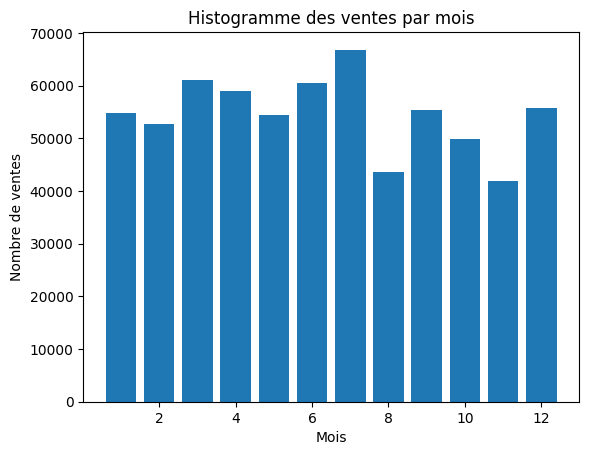

In [102]:
# Convertissez la colonne 'Date' en type datetime
df_wo_NaN['Date mutation'] = pd.to_datetime(df['Date mutation'], dayfirst=True)

# Extrayez le mois de chaque date et créez une nouvelle colonne 'Mois'
df_wo_NaN['Mois'] = df_wo_NaN['Date mutation'].dt.month

# Groupez les ventes par mois et comptez le nombre de ventes dans chaque mois
ventes_par_mois = df_wo_NaN.groupby('Mois')['Nature mutation'].count()

# Créez un histogramme
plt.bar(ventes_par_mois.index, ventes_par_mois.values)

# Étiquetez les axes et le titre
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.title('Histogramme des ventes par mois')

# Affichez l'histogramme
plt.show()


In [103]:
# df_ventes_par_mois = pd.DataFrame(ventes_par_mois, index=False)
df_ventes_par_mois = ventes_par_mois.to_frame().reset_index()
df_ventes_par_mois.columns

Index(['Mois', 'Nature mutation'], dtype='object')

In [105]:
import plotly.express as px

fig = px.line(df_ventes_par_mois, x="Mois", y="Nature mutation", title='Ventes par mois')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df_scatter = df_wo_NaN.head(1000)[['Commune', 'Valeur fonciere']]
df_scatter

,Commune,Valeur fonciere
3,BUELLAS,204332.0
9,MONTCET,400.0
12,FOISSIAT,4780.0
13,FOISSIAT,4780.0
14,POLLIAT,226700.0
...,...,...
4055,BAGE-DOMMARTIN,56500.0
4073,BOURG-EN-BRESSE,65000.0
4075,CONFRANCON,1962.0
4077,BOURG-EN-BRESSE,9500.0


In [ ]:
fig = px.scatter(df_scatter, x='Commune', y="Valeur fonciere")
fig.show()

In [ ]:
print("Il y a", len(df_wo_NaN["Commune"].unique()), "communes")

Il y a 30344 communes


On souhaite enlever les doublons

In [ ]:
df_wo_NaN.keys()

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'Type de voie', 'Voie', 'Code postal', 'Commune', 'Code commune',
       'Section', 'No plan', '1er lot', 'Surface Carrez du 1er lot',
       'Nombre de lots', 'Type local', 'Surface reelle bati',
       'Nombre pieces principales', 'Nature culture', 'Surface terrain',
       'col_concat', 'Mois'],
      dtype='object')

In [106]:
''.join(map(str,df_wo_NaN.loc[1]))

KeyError: 1